In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as math
import scipy as sci

In [3]:
df = pd.read_csv(r'C:\Users\Cheng Qiu\Documents\Python Scripts\Data Science\DS take home challenge\DataSet\Spanish Translation A\Translation_Test\test_table.csv')

df2 = pd.read_csv(r'C:\Users\Cheng Qiu\Documents\Python Scripts\Data Science\DS take home challenge\DataSet\Spanish Translation A\Translation_Test\user_table.csv')

In [5]:
df.head()


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [6]:
df2.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [40]:
##DF ID is unique
dfunique=df.groupby('user_id').nunique()
dfunique[dfunique['user_id']!=1]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
user_id,,,,,,,,,


In [41]:
##DF2 ID is unique
dfunique=df2.groupby('user_id').nunique()
dfunique[dfunique['user_id']!=1]

,user_id,sex,age,country
user_id,,,,


In [34]:
# another way to get counts 
df.user_id.value_counts()

2047      1
83074     1
406636    1
402542    1
449649    1
         ..
324555    1
312269    1
316367    1
271313    1
4098      1
Name: user_id, Length: 453321, dtype: int64

In [68]:
dfc = pd.merge(df,df2, on = 'user_id', how = 'inner')

In [69]:
dfc.head(10)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35,Mexico
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0,M,22,Spain
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33,Mexico


In [70]:
df.shape

(453321, 9)

In [71]:
df2.shape

(452867, 4)

In [72]:
#looks like some visitor information is the in the user_table 
dfc.shape

(452867, 12)

In [102]:
nospain= dfc[dfc['country'] != 'Spain']

In [73]:
old = dfc[dfc['test'] == 0]

In [77]:
oldcon=old.groupby('country')['conversion'].mean()

In [75]:
new = dfc[dfc['test'] == 1]

In [78]:
newcon = new.groupby('country')['conversion'].mean()

In [79]:
conv = pd.merge(oldcon,newcon,on='country',how='left')

In [80]:
conv

,conversion_x,conversion_y
country,,
Argentina,0.015071,0.013725
Bolivia,0.049369,0.047901
Chile,0.048107,0.051295
Colombia,0.052089,0.050571
Costa Rica,0.052256,0.054738
Ecuador,0.049154,0.048988
El Salvador,0.053554,0.047947
Guatemala,0.050643,0.048647
Honduras,0.050906,0.047540


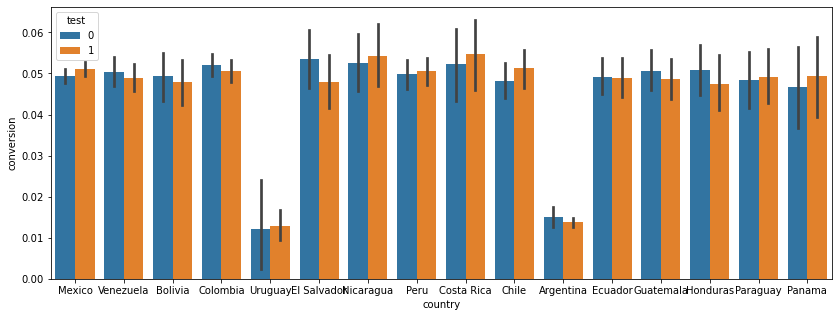

In [103]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'country', y = 'conversion', hue = 'test', data = nospain)
##8 out of 16 markets experienced decrease on converstion rate after the change

## Increase Mexico Uruguay Nicaragua Peru Chile Paraguay Panama CostaRica
## Decrease Venezuela Bolivia Columbia Salvador Argentina Ecuador Guatamala Hondura


In [95]:
##t test
##small p value reject null that 2 means are the same confirms that effect is negative

sci.stats.ttest_ind(old[old['country'] != 'Spain']['conversion'],new[new['country'] != 'Spain']['conversion'])

Ttest_indResult(statistic=7.382252163053968, pvalue=1.559329277881674e-13)

In [ ]:
## Doesnt neccessarily mean local translation is bad, there might be other factors need to further segment to see 

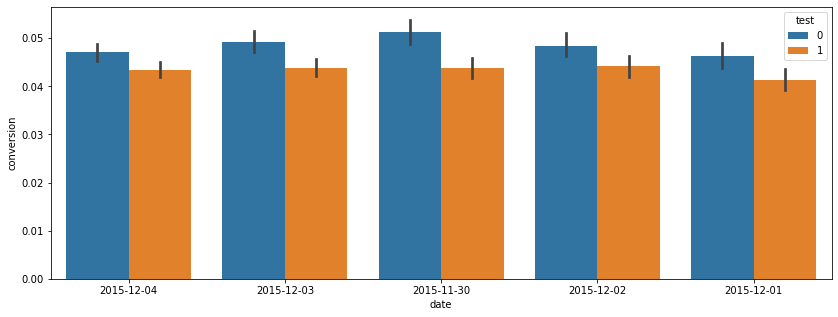

In [104]:
#time didnt have effect, same effect on different dates
plt.figure(figsize=(14,5))
sns.barplot(x = 'date', y = 'conversion', hue = 'test', data = nospain)

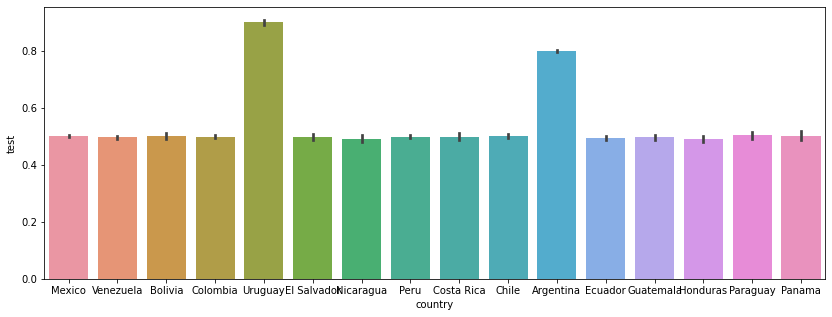

In [106]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'country', y = 'test', data = nospain)

## looks like urugat abd Argentina has a lot more test than control. uneven split 

In [128]:
nospain.groupby('country')['test'].mean()

country
Argentina      0.799799
Bolivia        0.501079
Chile          0.500785
Colombia       0.498927
Costa Rica     0.498964
Ecuador        0.494432
El Salvador    0.497492
Guatemala      0.496066
Honduras       0.491013
Mexico         0.500257
Nicaragua      0.491447
Panama         0.502404
Paraguay       0.503199
Peru           0.498931
Uruguay        0.899613
Venezuela      0.496194
Name: test, dtype: float64

In [119]:
noSUA = nospain[-nospain['country'].isin (['Uruguay','Argentina'])]




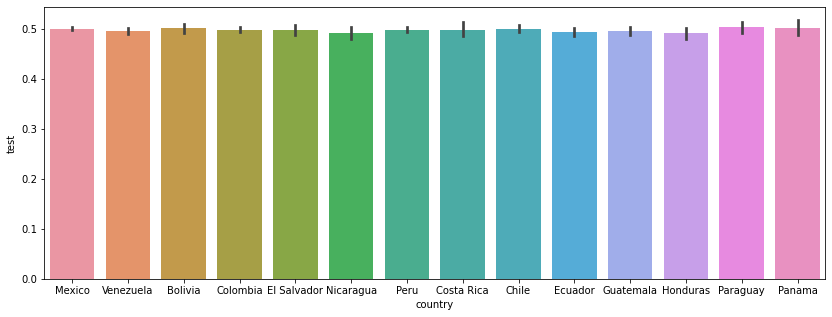

In [120]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'country', y = 'test', data = noSUA)

In [122]:
noSUA.groupby('test')['conversion'].mean()

##after deleting those countries, conversion rate is actually higher in test groups 

test
0    0.050148
1    0.050413
Name: conversion, dtype: float64

In [126]:
sci.stats.ttest_ind(noSUA[noSUA['test']==0]['conversion'], noSUA[noSUA['test']==1]['conversion'])


## t test showing the localizing language has no effect 

Ttest_indResult(statistic=-0.35834777774948234, pvalue=0.7200832833651563)

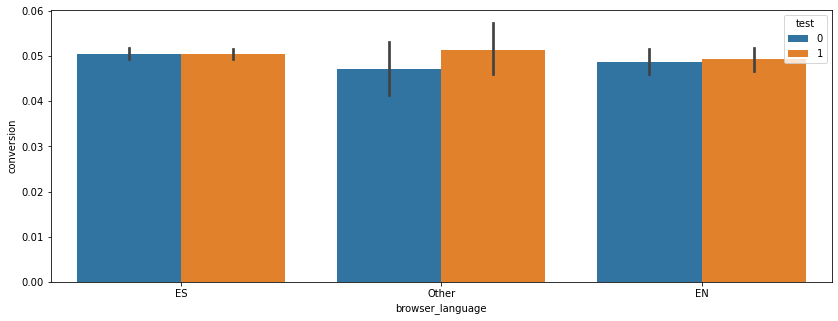

In [127]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'browser_language', y = 'conversion', hue = 'test', data = noSUA)

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'browser_language', y = 'conversion', hue = 'test', data = noSUA)